In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Simple hacks to make plots look better: 

# Colour palette to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13)   

# 6.1.5 Practical
A real estate developer, Derek, is planning to start a new project to build family homes. He has access to historic data for the region in which he has acquired land for the project. The historic data includes the prices for houses sold in the area over a 10-year period. The data also includes information about the number of bedrooms in each house ranging from one to five rooms. 

Derek has asked you to analyse the data for any trends that might be evident. He wants to know the optimal number of bedrooms to maximise the profit for the project. In other words, Derek wants to know what the optimal amount of rooms per property should be to gain the highest profit. 

In [3]:
# import sales data
data=pd.read_csv("raw_sales.csv")
data

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [4]:
# creating new df with datesold as index as a date
datesold = "datesold"
data2=pd.read_csv("raw_sales.csv", index_col=['datesold'], parse_dates=[datesold])
print(data2.shape)
print(data2.columns)
print(data2.dtypes)
data2

(29580, 4)
Index(['postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')
postcode         int64
price            int64
propertyType    object
bedrooms         int64
dtype: object


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3
...,...,...,...,...
2019-07-25,2900,500000,unit,3
2019-07-25,2612,560000,unit,2
2019-07-26,2912,464950,unit,2


## Plot house prices over time

In [5]:
# Check for missing data
missing_data = data2.isna()

# Print the number of missing values in each column
print(missing_data.sum())

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64


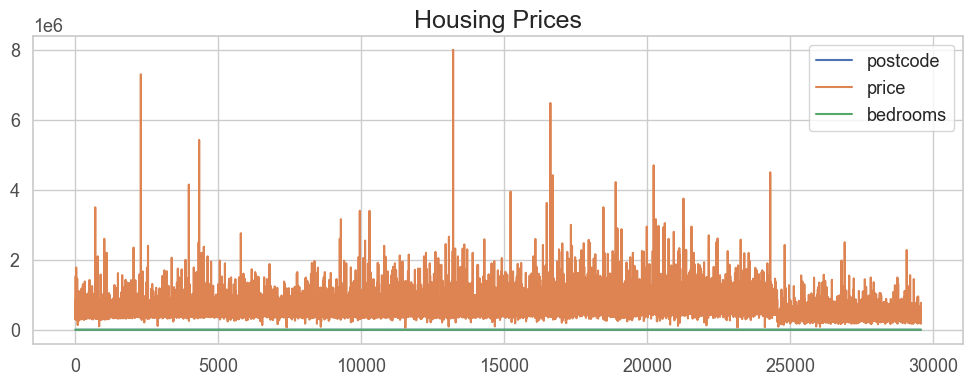

In [6]:
# Plot house prices as time series.
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Housing Prices")
plt.show(block=False);